In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a = -np.pi/2+0.1
b = np.pi/2-0.1

Функция f(x)

In [ ]:
def f(x):
    return np.tan(x) - np.cos(x) + 0.1

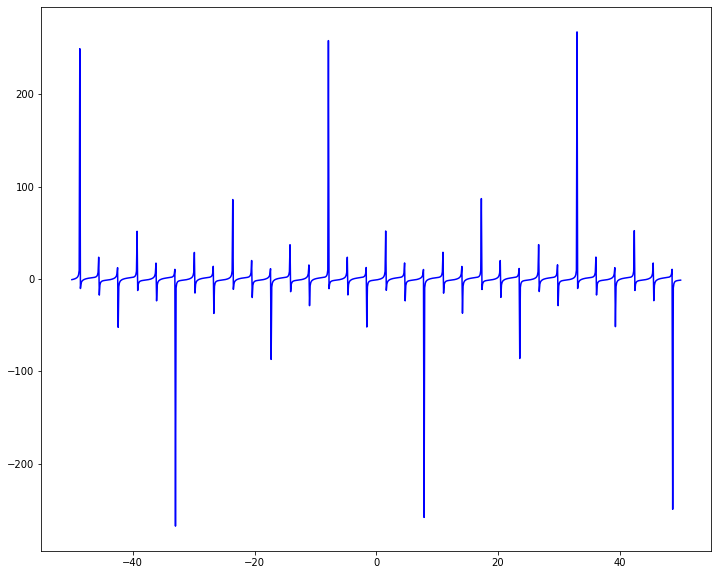

In [ ]:
x_test = np.linspace(-50,50,num = 1000)
y_test = f(x_test)
fig, ax = plt.subplots()
ax.plot(x_test,y_test, 'b', label = 'test function', linewidth=1.5)
fig.set_size_inches(12, 10)


In [ ]:
x_test.shape

(1000,)

Функция h(x)

In [ ]:
def h(x):
  return np.abs(x) * (np.tan(x) - np.cos(x) + 0.1)

Функция вычисления полинома Лагранжа

In [ ]:
def lagrange(x_data, y_data, x):
    ans = 0.0
    for i in range(len(y_data)):
        t = y_data[i]
        for j in range(len(y_data)):
            if i != j:
                t *= (x - x_data[j]) / (x_data[i] - x_data[j])
        ans += t
    return ans


Функция вычисления полинома Ньютона

In [ ]:
def poly_newton_coefficient(x, y):
    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
    a = poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p


Вычисление интерполяционных полиномов для f(x)

In [ ]:
x = np.linspace(a,b,50)
y = f(x)

In [ ]:
y_L = [lagrange(x,y,i) for i in x]
y_N = [newton_polynomial(x,y,i) for i in x]

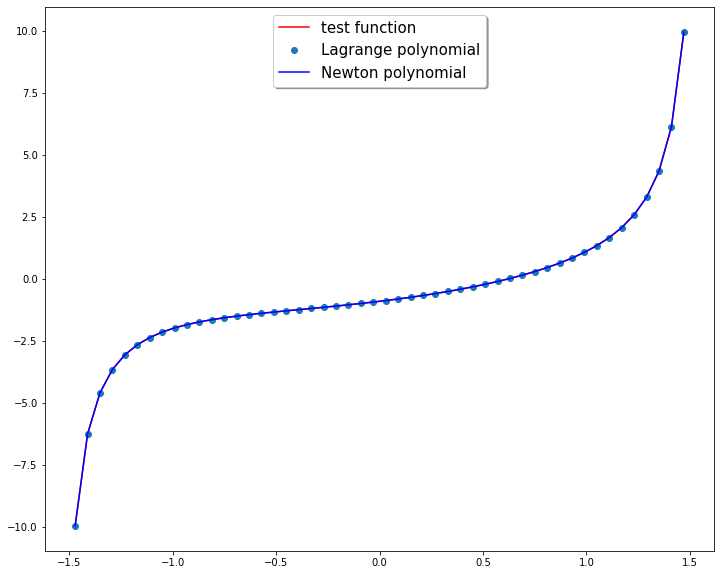

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y, 'r', label = 'test function', linewidth=1.5)
ax.plot(x,y_L, 'o', label = 'Lagrange polynomial', linewidth=1.5)
ax.plot(x,y_N, 'b', label = 'Newton polynomial', linewidth=1.5)
ax.legend(loc='upper center', shadow=True, fontsize=15)
fig.set_size_inches(12, 10)


Вычисление интерполяционных полиномов для f(x) в узлах по формуле

In [ ]:
def choose_nods(x,n):
  for i in range(n):
    x = np.append(x, 1/2*((b-a)*np.cos((2*i+1)/(2*(n+1))*np.pi)+(b+a)))
  return x


In [ ]:
x_adjusted = choose_nods(np.array([]),20)
y_adjusted = f(x_adjusted)
y_adj_L = [lagrange(x_adjusted,y_adjusted,i) for i in x_adjusted]
y_adj_N = [newton_polynomial(x_adjusted,y_adjusted,i) for i in x_adjusted]

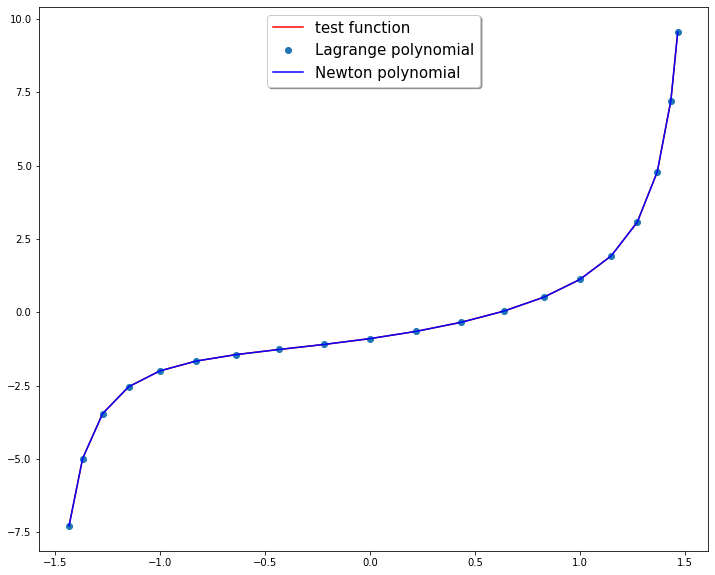

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_adjusted,y_adjusted, 'r', label = 'test function', linewidth=1.5)
ax.plot(x_adjusted,y_adj_L, 'o', label = 'Lagrange polynomial', linewidth=1.5)
ax.plot(x_adjusted,y_adj_N, 'b', label = 'Newton polynomial', linewidth=1.5)
ax.legend(loc='upper center', shadow=True, fontsize=15)
fig.set_size_inches(12, 10)

Вычисление интерполяционных полиномов для h(x):


In [ ]:
x_h = np.linspace(a,b,20)
z = h(x_h)

In [ ]:
z_L = [lagrange(x_h,z,i) for i in x_h]
z_N = [newton_polynomial(x_h,z,i) for i in x_h]

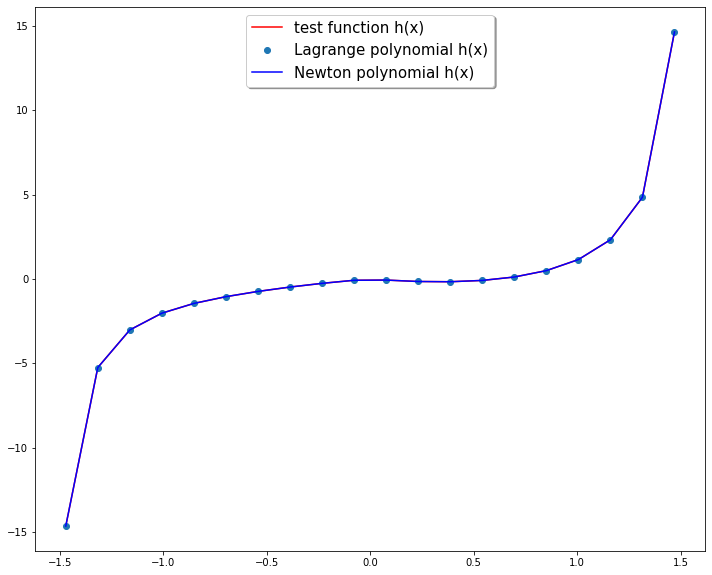

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_h,z, 'r', label = 'test function h(x)', linewidth=1.5)
ax.plot(x_h,z_L, 'o', label = 'Lagrange polynomial h(x)', linewidth=1.5)
ax.plot(x_h,z_N, 'b', label = 'Newton polynomial h(x)', linewidth=1.5)
ax.legend(loc='upper center', shadow=True, fontsize=15)
fig.set_size_inches(12, 10)


Вычисление интерполяционных полиномов для h(x) в узлах по формуле

In [ ]:
x_h_adjusted = choose_nods(np.array([]),20)
z_adjusted = f(x_h_adjusted)
z_adj_L = [lagrange(x_h_adjusted,z_adjusted,i) for i in x_h_adjusted]
z_adj_N = [newton_polynomial(x_h_adjusted,z_adjusted,i) for i in x_h_adjusted]

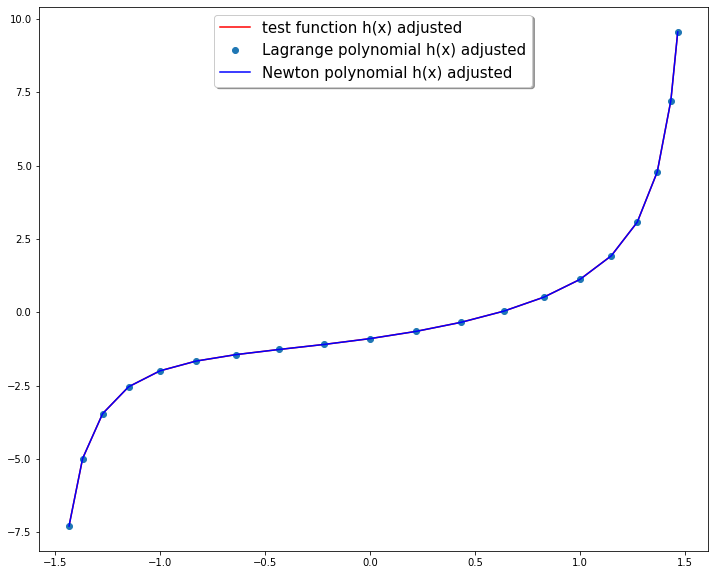

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_h_adjusted,z_adjusted, 'r', label = 'test function h(x) adjusted ', linewidth=1.5)
ax.plot(x_h_adjusted,z_adj_L, 'o', label = 'Lagrange polynomial h(x) adjusted', linewidth=1.5)
ax.plot(x_h_adjusted,z_adj_N, 'b', label = 'Newton polynomial h(x) adjusted', linewidth=1.5)
ax.legend(loc='upper center', shadow=True, fontsize=15)
fig.set_size_inches(12, 10)

Значения функции и полиномов

In [ ]:
X = 1
x_1 = np.linspace(a,b,20)
y_1 = f(x_1)
z_1 = h(x_1)
newton = newton_polynomial(x_1, y_1, X)
lagrange_ans = lagrange(x_1, y_1, X)
newton_h = newton_polynomial(x_1, z_1, X)
lagrange_h = lagrange(x_1, z_1, X)
print("Истинное значение в x = 1: {}".format(f(X)))
print("Лагранжева интерполяция: {}".format(lagrange_ans))
print("Интерполяция Ньютона: {}".format(newton))
print("Лагранжева интерполяция для h(x): {}".format(lagrange_ans))
print("Интерполяция Ньютона для h(x): {}".format(newton))


Истинное значение в x = 1: 1.1171054187867626
Лагранжева интерполяция: 1.1170945188323815
Интерполяция Ньютона: 1.1170945188342554
Лагранжева интерполяция для h(x): 1.1170945188323815
Интерполяция Ньютона для h(x): 1.1170945188342554


In [ ]:
x_1_adjusted = choose_nods(np.array([]),20)
y_1_adjusted = f(x_1_adjusted)
z_1_adjusted = h(x_1_adjusted)
newtonz_1_adjusted = newton_polynomial(x_1_adjusted, y_1_adjusted, X)
lagrange_ansz_1_adjusted = lagrange(x_1_adjusted, y_1_adjusted, X)
newton_hz_1_adjusted = newton_polynomial(x_1_adjusted, z_1_adjusted, X)
lagrange_hz_1_adjusted = lagrange(x_1_adjusted, z_1_adjusted, X)
print("Истинное значение в x = 1: {}".format(f(X)))
print("Лагранжева интерполяция в узлах по формуле: {}".format(lagrange_ansz_1_adjusted))
print("Интерполяция Ньютона в узлах по формуле: {}".format(newtonz_1_adjusted))
print("Лагранжева интерполяция для h(x) в узлах по формуле: {}".format(lagrange_hz_1_adjusted))
print("Интерполяция Ньютона для h(x) в узлах по формуле: {}".format(newton_hz_1_adjusted))

Истинное значение в x = 1: 1.1171054187867626
Лагранжева интерполяция в узлах по формуле: 1.1170904925145757
Интерполяция Ньютона в узлах по формуле: 1.1170904925145866
Лагранжева интерполяция для h(x) в узлах по формуле: 1.1171144559579291
Интерполяция Ньютона для h(x) в узлах по формуле: 1.1171144559579176
